In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/Iris.csv")

print(data.info())

print(data.describe())
print(data.describe(include='object'))
data.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [68]:
data.drop(['Id'],axis=1,inplace=True)
data.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [69]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()
data['target']=le.fit_transform(data['Species'])
class_names=le.classes_

In [70]:
data.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0


In [71]:
x=data.iloc[:,:-2]
y=data['target']

In [72]:
# Normalize features
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
k_values=list(range(1,16))
train_accuracies=[]
test_accuracies=[]
cv_scores=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracies.append(accuracy_score(y_train,knn.predict(x_train)))
    test_accuracies.append(accuracy_score(y_test,knn.predict(x_test)))
    cv=cross_val_score(knn,
                         np.vstack((x_train,x_test)),
                         np.hstack((y_train,y_test)),cv=5)
    cv_scores.append(cv.mean())

results=pd.DataFrame({
    'k': k_values,
    'train_accuracy':train_accuracies,
    'test_accuracy':test_accuracies,
    'cv_accuracy':cv_scores
})
print("\nAccuracy results for different k values:")
print(results)
print("\n",knn.score(x_test,y_test)*100)


Accuracy results for different k values:
     k  train_accuracy  test_accuracy  cv_accuracy
0    1        1.000000       0.966667     0.953333
1    2        0.966667       0.933333     0.953333
2    3        0.966667       0.933333     0.940000
3    4        0.958333       0.933333     0.960000
4    5        0.975000       0.933333     0.960000
5    6        0.958333       0.933333     0.960000
6    7        0.966667       0.966667     0.966667
7    8        0.958333       0.933333     0.953333
8    9        0.958333       0.966667     0.960000
9   10        0.958333       0.966667     0.966667
10  11        0.958333       0.966667     0.953333
11  12        0.958333       0.966667     0.960000
12  13        0.958333       0.966667     0.960000
13  14        0.966667       0.933333     0.953333
14  15        0.966667       0.933333     0.953333

 93.33333333333333


In [75]:
best_idx=results['test_accuracy'].idxmax()
best_k=int(results.loc[best_idx,'k'])
print(f"\n✅ Best k: {best_k} with Test Accuracy={results.loc[best_idx,'test_accuracy']:.4f}")


✅ Best k: 1 with Test Accuracy=0.9667


In [76]:
best_knn=KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred=best_knn.predict(x_test)

print("\nConfusion Matrix:")
cf=confusion_matrix(y_test, y_pred)
print(cf)
print("\nClassification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

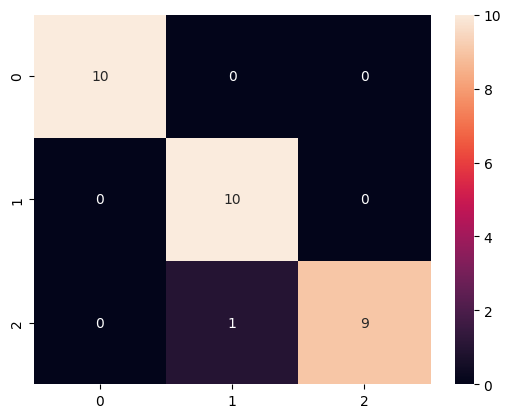

In [77]:
sns.heatmap(cf,annot=True)

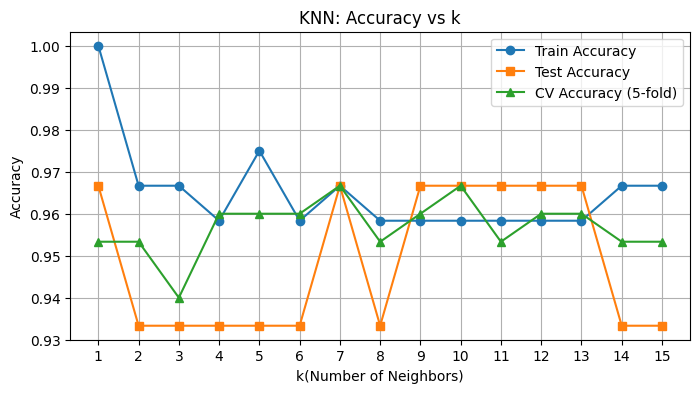

In [78]:
plt.figure(figsize=(8,4))
plt.plot(k_values,train_accuracies, marker='o',label='Train Accuracy')
plt.plot(k_values,test_accuracies, marker='s',label='Test Accuracy')
plt.plot(k_values,cv_scores, marker='^',label='CV Accuracy (5-fold)')
plt.xlabel('k(Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [79]:
feature_names=['SepalLengthCm','SepalWidthCm']
x_vis=data[feature_names].values
vis_scaler=StandardScaler()
x_vis_scaled=vis_scaler.fit_transform(x_vis)

xv_train,xv_test,yv_train,yv_test=train_test_split(x_vis_scaled,y,test_size=0.2,random_state=42,stratify=y)

knn_vis=KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(xv_train,yv_train)

KNeighborsClassifier(n_neighbors=1)

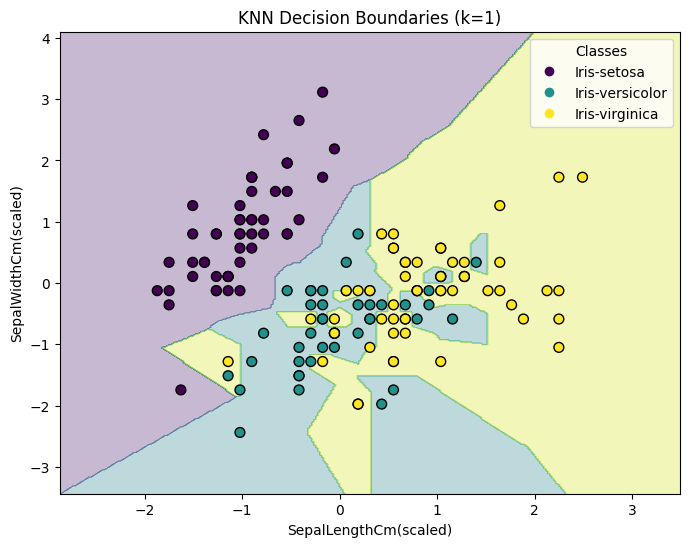

In [80]:
h=0.02
x_min,x_max=x_vis_scaled[:,0].min()-1,x_vis_scaled[:, 0].max()+1
y_min,y_max=x_vis_scaled[:,1].min()-1,x_vis_scaled[:, 1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))

Z=knn_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,alpha=0.3)
scatter=plt.scatter(x_vis_scaled[:,0],x_vis_scaled[:,1],c=y,edgecolor='k',s=50)
plt.xlabel(feature_names[0]+"(scaled)")
plt.ylabel(feature_names[1]+"(scaled)")
plt.title(f"KNN Decision Boundaries (k={best_k})")

handles,_=scatter.legend_elements()
plt.legend(handles,class_names,title="Classes")
plt.show()